# Scaling

Changing the range of our dataset.

[Visual Demos](https://stats-demos.zach.wiki/)

0. tldr

    - Use a min-max scaler before you do modeling.
    - Generally prefer unscaled data, except in modeling.
    - Learn parameters for scaling from the training split.

1. Data Split

    Scaling params found from train, applied to validate and test.
    
    Data split lets us get an idea of how well our model generalizes.

2. Scaling - when, where, what, why, and how

    - why
        - visualize the combination of 2 variables with different scales
        - stats tests that assume normality
        - improves most model's implementation
        - a better interpretation of the data (e.g. log scaling)
        - combining features
    - when
        - data prep / exploration
        - pipeline: prep
        - lifecycle: prep/exploration
        - when one of the conditions above is met. Otherwise, it's better to work with the original units
    - where
        - the training dataset
        - usually just the independent variables
        - indep vars are scaled independently
        - scale whatever goes into the model
    - how
        - `sklearn.preprocessing` -- requires 2d array
        - make the thing, fit the thing, use the thing
        - `.fit` to learn parameters, `.transform` to apply the scaling
        - seperate scaled dataframes and/or columns

3. Linear Scaling

    - MinMax: everything between 0 and 1
        $$ x' = \frac{x - \text{max}(x)}{\text{max}(x) - \text{min}(x)} $$
    - Standard: a zscore, standard deviations from the mean, **center** + **scale**
        $$ x' = \frac{x - \bar{x}}{s_x} $$
    - Robust: robust to and preserves outliers
        $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$

4. Non-linear Scaling

    - Quantile: data points are "ranked", for a normal output, highest_orig -> highest_norm and then 2nd highest, etc

    - Log

        $$ x' = \log_b{x} $$

        $$ b^{x'} = x $$

        Sometimes you can just set the x/y scale w/ matplotlib instead of
        actually transforming the data
        
    - Power Trasnformation: Box-Cox and Yeo-Johnson

In [21]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset

In [5]:
tips = pydataset.data('tips')

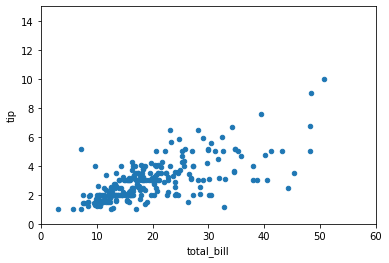

In [8]:
tips.plot.scatter(y='tip', x='total_bill', xlim=(0, 60), ylim=(0, 15))

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64


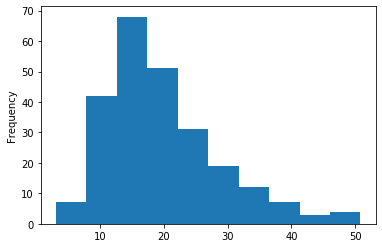

In [11]:
print(tips.total_bill.describe())
tips.total_bill.plot.hist()

In [13]:
train_and_validate, test = train_test_split(tips, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((188, 7), (30, 7), (26, 7))

In [16]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. fit the object
scaler.fit(train[['total_bill']])
# 3. use the object
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

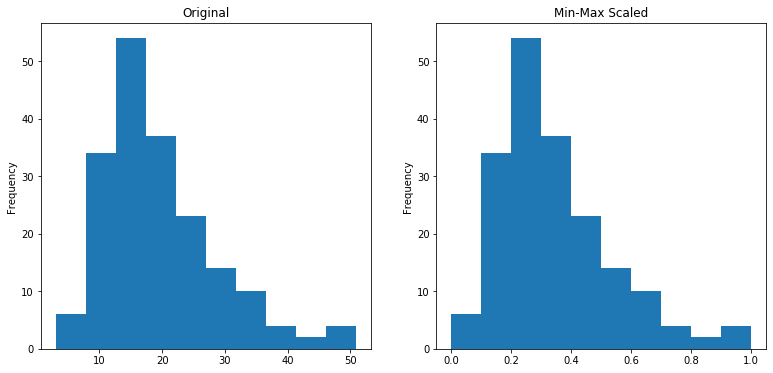

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_bill.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Min-Max Scaled')

## Standard Scaler

In [24]:
# 1. create the object
scaler = sklearn.preprocessing.StandardScaler()
# 2. fit the object
scaler.fit(train[['total_bill']])
# 3. use the object
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

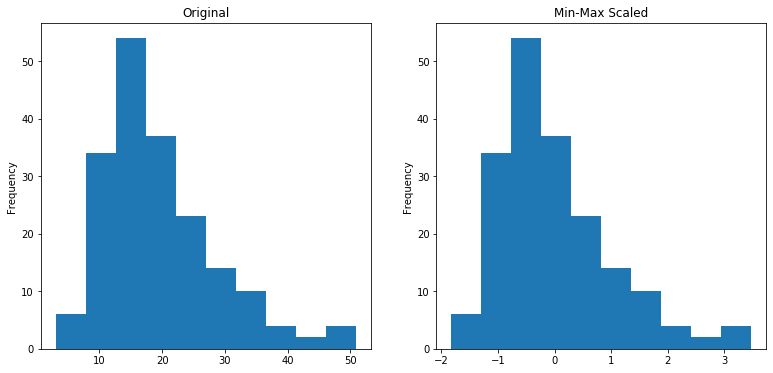

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_bill.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Min-Max Scaled')

In [26]:
# 1. create the object
scaler = sklearn.preprocessing.RobustScaler()
# 2. fit the object
scaler.fit(train[['total_bill']])
# 3. use the object
train['total_bill_scaled'] = scaler.transform(train[['total_bill']])
test['total_bill_scaled'] = scaler.transform(test[['total_bill']])
validate['total_bill_scaled'] = scaler.transform(validate[['total_bill']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

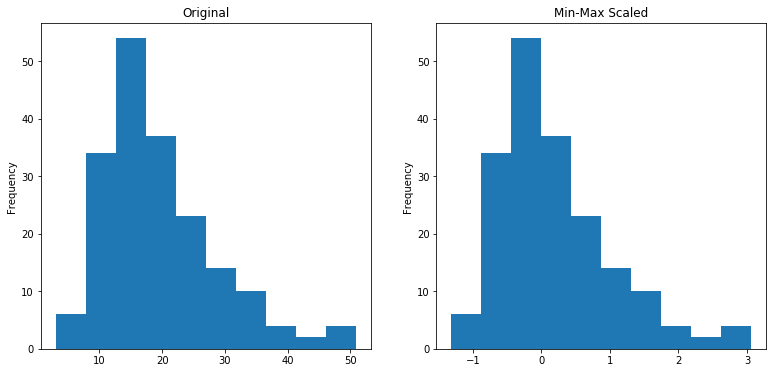

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_bill.plot.hist(title='Original')
plt.subplot(122)
train.total_bill_scaled.plot.hist(title='Min-Max Scaled')